<a href="https://colab.research.google.com/github/sunandhini96/School_of_AI_Assignment_8/blob/main/sunandini_assignment_8_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sunandhini96/Main_Models.git

Cloning into 'Main_Models'...
remote: Enumerating objects: 238, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 238 (delta 71), reused 0 (delta 0), pack-reused 108
Receiving objects: 100% (238/238), 71.31 KiB | 2.97 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [2]:
cd /content/Main_Models

/content/Main_Models


In [3]:
!ls

main.py  Models  README.md  utils.py


In [4]:
from Models import *

In [5]:
from main import *

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
!pip install torch_lr_finder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from Models.custom_resnet import CustomResNet,ResBlock

hello
CUDA Available? True


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified
torch.Size([60, 3, 32, 32])
Files already downloaded and verified


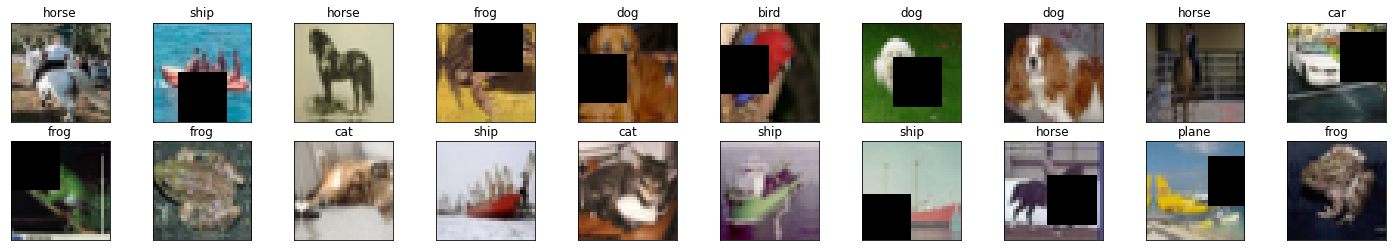

In [8]:
from utils import *

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = CustomResNet(ResBlock).to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
         ResBlock-14          [-1,

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import datasets, transforms
from tqdm import tqdm

In [11]:
# loading the dataset
exp = datasets.CIFAR10('./data', train=True, download=True)
exp_data = exp.data

# Calculate the mean and std for normalization
print('[Train]')
print(' - Numpy Shape:', exp_data.shape)
print(' - min:', np.min(exp_data, axis=(0,1,2)) / 255.)
print(' - max:', np.max(exp_data, axis=(0,1,2)) / 255.)
print(' - mean:', np.mean(exp_data, axis=(0,1,2)) / 255.)
print(' - std:', np.std(exp_data, axis=(0,1,2)) / 255.)
print(' - var:', np.var(exp_data, axis=(0,1,2)) / 255.)

Files already downloaded and verified
[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - min: [0. 0. 0.]
 - max: [1. 1. 1.]
 - mean: [0.49139968 0.48215841 0.44653091]
 - std: [0.24703223 0.24348513 0.26158784]
 - var: [15.56135559 15.11767693 17.44919073]


In [12]:
exp.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

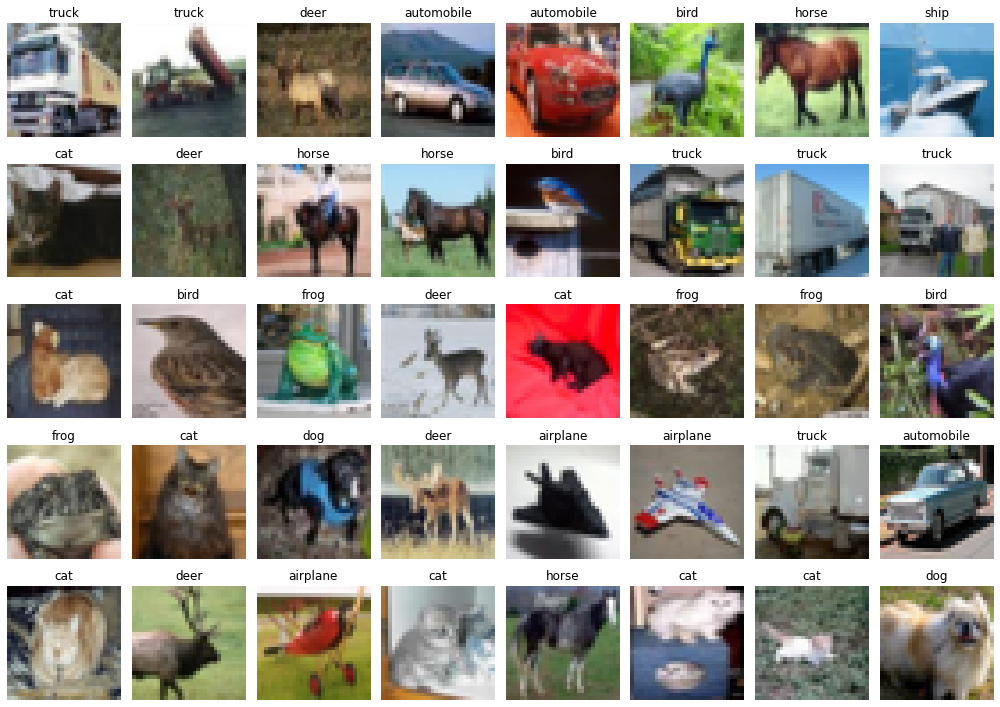

In [13]:
viz_data()


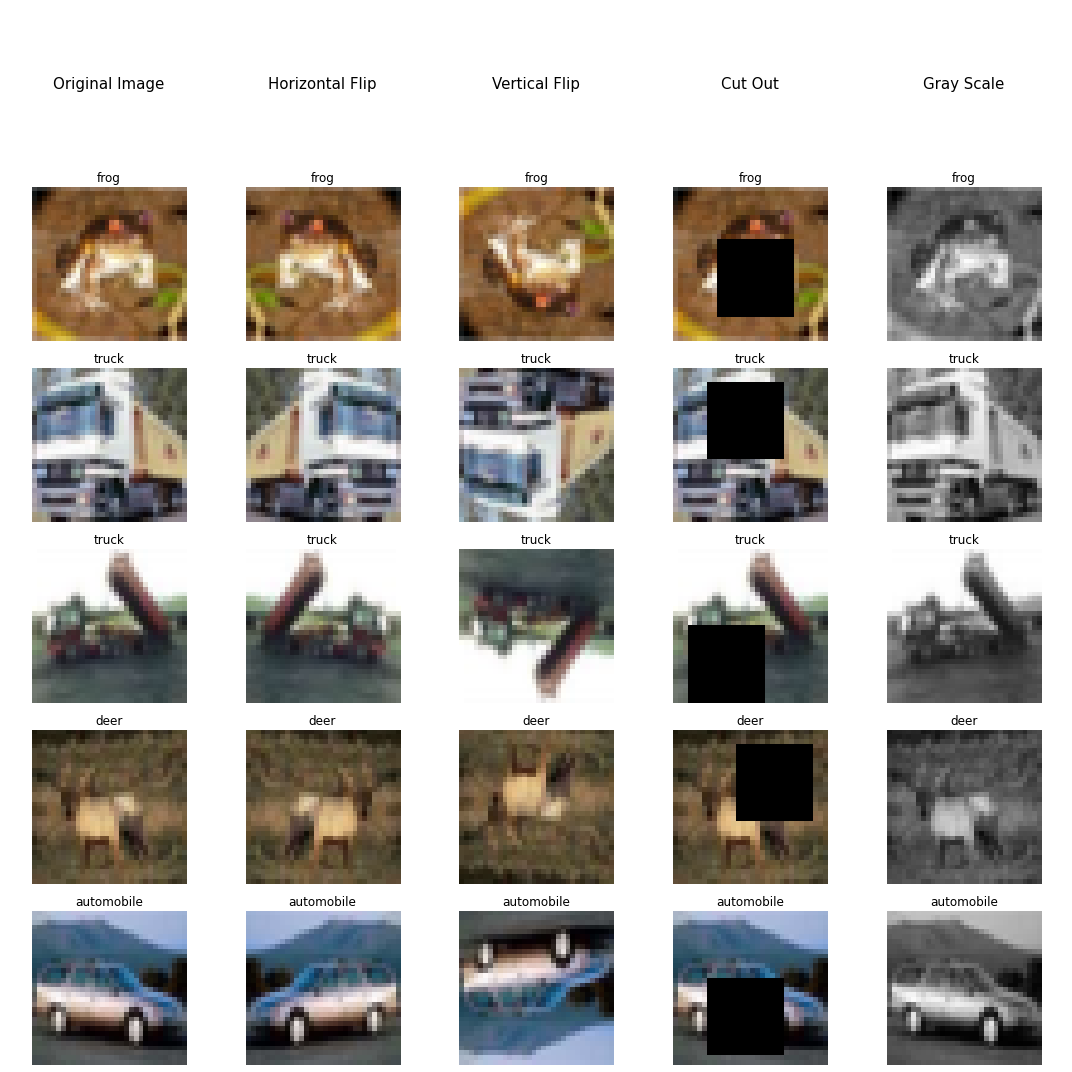

In [14]:
show_images({
    'Original Image': None,
    'Horizontal Flip': A.HorizontalFlip(always_apply=True),
    'Vertical Flip': A.VerticalFlip(always_apply=True),
    'Cut Out': A.CoarseDropout(max_holes=1, max_height=16, max_width=16, min_holes=1, min_height=16, 
                               min_width=16, fill_value=0.473363, mask_fill_value=None, always_apply=True),
    'Gray Scale': A.ToGray(always_apply=True)
})

In [15]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available:", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)
    BATCH_SIZE=512
else:
    BATCH_SIZE=64

CUDA Available: True


In [26]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True )
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True)


train_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(trainset, train=True), batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(AlbumentationImageDataset(testset, train=False), batch_size=BATCH_SIZE,
                                          shuffle=False, num_workers=1)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.15E-03


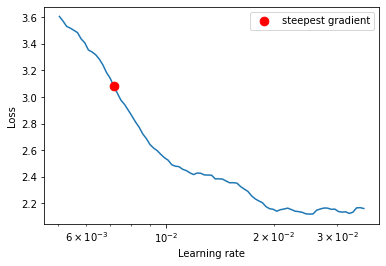

(<AxesSubplot:xlabel='Learning rate', ylabel='Loss'>, 0.00715459811622974)

In [27]:
net4 = CustomResNet(ResBlock).to(device)
import copy
net4_exp = copy.deepcopy(net4)
optimizer = torch.optim.SGD(net4_exp.parameters(), lr=0.004,momentum=0.9)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(net4_exp, optimizer, criterion, device=device)
lr_finder.range_test(train_loader, end_lr=0.04, num_iter=100)
lr_finder.plot() 

In [28]:
min_loss = min(lr_finder.history['loss'])
ler_rate = lr_finder.history['lr'][np.argmin(lr_finder.history['loss'], axis=0)]
print("Max LR is {}".format(ler_rate))

Max LR is 0.02512116576733701


In [29]:
min_lr=ler_rate/10
print("Min LR is {}".format(min_lr))

Min LR is 0.002512116576733701


In [30]:
Epochs=24
optimizer = torch.optim.SGD(net4.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, 
                                                max_lr=ler_rate,
                                                steps_per_epoch=len(train_loader), 
                                                epochs=Epochs,
                                                pct_start=5/Epochs,
                                                div_factor=1000,
                                                three_phase=False, 
                                                final_div_factor=1000,
                                                anneal_strategy='linear'
                                                ) #final_div_factor=100,
net, history = fit_model(
    net=net4, device=device,
    criterion = nn.CrossEntropyLoss(),
    train_loader=train_loader, test_loader=test_loader,
    optimizer=optimizer, 
    scheduler=scheduler, 
    NUM_EPOCHS=24
)

EPOCH: 1 (LR: 2.512116576733701e-05)


Batch_id=97 Loss=2.00148 Accuracy=37.30%: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 1.2618, Accuracy: 5545/10000 (55.45%)

EPOCH: 2 (LR: 0.005054594317002159)


Batch_id=97 Loss=1.19086 Accuracy=59.68%: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 0.8936, Accuracy: 6933/10000 (69.33%)

EPOCH: 3 (LR: 0.01008406746823698)


Batch_id=97 Loss=0.98635 Accuracy=67.60%: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 0.9926, Accuracy: 7032/10000 (70.32%)

EPOCH: 4 (LR: 0.015113540619471802)


Batch_id=97 Loss=0.96344 Accuracy=70.56%: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.8006, Accuracy: 7503/10000 (75.03%)

EPOCH: 5 (LR: 0.020143013770706625)


Batch_id=97 Loss=0.77750 Accuracy=75.63%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.5945, Accuracy: 8096/10000 (80.96%)

EPOCH: 6 (LR: 0.025107674284712857)


Batch_id=97 Loss=0.61725 Accuracy=79.72%: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]



Test set: Average loss: 0.6211, Accuracy: 8051/10000 (80.51%)

EPOCH: 7 (LR: 0.02378550898754595)


Batch_id=97 Loss=0.56166 Accuracy=81.61%: 100%|██████████| 98/98 [00:27<00:00,  3.55it/s]



Test set: Average loss: 0.4840, Accuracy: 8437/10000 (84.37%)

EPOCH: 8 (LR: 0.022463343690379042)


Batch_id=97 Loss=0.47365 Accuracy=83.97%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.5665, Accuracy: 8225/10000 (82.25%)

EPOCH: 9 (LR: 0.021141178393212137)


Batch_id=97 Loss=0.42812 Accuracy=85.60%: 100%|██████████| 98/98 [00:28<00:00,  3.44it/s]



Test set: Average loss: 0.4703, Accuracy: 8549/10000 (85.49%)

EPOCH: 10 (LR: 0.019819013096045227)


Batch_id=97 Loss=0.37635 Accuracy=87.14%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.6258, Accuracy: 8158/10000 (81.58%)

EPOCH: 11 (LR: 0.01849684779887832)


Batch_id=97 Loss=0.35429 Accuracy=88.04%: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 0.4937, Accuracy: 8513/10000 (85.13%)

EPOCH: 12 (LR: 0.017174682501711412)


Batch_id=97 Loss=0.32664 Accuracy=88.77%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.4572, Accuracy: 8626/10000 (86.26%)

EPOCH: 13 (LR: 0.015852517204544503)


Batch_id=97 Loss=0.29034 Accuracy=89.99%: 100%|██████████| 98/98 [00:27<00:00,  3.53it/s]



Test set: Average loss: 0.4134, Accuracy: 8756/10000 (87.56%)

EPOCH: 14 (LR: 0.014530351907377597)


Batch_id=97 Loss=0.26615 Accuracy=90.69%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.4132, Accuracy: 8700/10000 (87.00%)

EPOCH: 15 (LR: 0.01320818661021069)


Batch_id=97 Loss=0.23823 Accuracy=91.79%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.4052, Accuracy: 8745/10000 (87.45%)

EPOCH: 16 (LR: 0.011886021313043782)


Batch_id=97 Loss=0.21026 Accuracy=92.67%: 100%|██████████| 98/98 [00:28<00:00,  3.42it/s]



Test set: Average loss: 0.4025, Accuracy: 8790/10000 (87.90%)

EPOCH: 17 (LR: 0.010563856015876876)


Batch_id=97 Loss=0.18785 Accuracy=93.43%: 100%|██████████| 98/98 [00:27<00:00,  3.54it/s]



Test set: Average loss: 0.4196, Accuracy: 8742/10000 (87.42%)

EPOCH: 18 (LR: 0.009241690718709967)


Batch_id=97 Loss=0.17019 Accuracy=94.05%: 100%|██████████| 98/98 [00:28<00:00,  3.48it/s]



Test set: Average loss: 0.3667, Accuracy: 8898/10000 (88.98%)

EPOCH: 19 (LR: 0.007919525421543058)


Batch_id=97 Loss=0.15328 Accuracy=94.72%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.3596, Accuracy: 8935/10000 (89.35%)

EPOCH: 20 (LR: 0.006597360124376152)


Batch_id=97 Loss=0.13613 Accuracy=95.28%: 100%|██████████| 98/98 [00:27<00:00,  3.50it/s]



Test set: Average loss: 0.3709, Accuracy: 8894/10000 (88.94%)

EPOCH: 21 (LR: 0.0052751948272092425)


Batch_id=97 Loss=0.12078 Accuracy=95.81%: 100%|██████████| 98/98 [00:27<00:00,  3.52it/s]



Test set: Average loss: 0.3546, Accuracy: 8964/10000 (89.64%)

EPOCH: 22 (LR: 0.003953029530042337)


Batch_id=97 Loss=0.10394 Accuracy=96.50%: 100%|██████████| 98/98 [00:28<00:00,  3.49it/s]



Test set: Average loss: 0.3573, Accuracy: 8983/10000 (89.83%)

EPOCH: 23 (LR: 0.0026308642328754274)


Batch_id=97 Loss=0.08855 Accuracy=97.00%: 100%|██████████| 98/98 [00:28<00:00,  3.45it/s]



Test set: Average loss: 0.3428, Accuracy: 9018/10000 (90.18%)

EPOCH: 24 (LR: 0.0013086989357085216)


Batch_id=97 Loss=0.07522 Accuracy=97.53%: 100%|██████████| 98/98 [00:27<00:00,  3.51it/s]



Test set: Average loss: 0.3337, Accuracy: 9048/10000 (90.48%)

